In [1]:
# Blocage de la sauvegarde automatique.
%autosave 0

# Importation des librairies nécessaires.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importation du DataFrame consolidé.
avis_trustpilot = pd.read_excel(r"C:\................\df_complet.xlsx")
avis_trustpilot.head()

Autosave disabled


,Client,Nombre_avis_publie,Note,Titre,Commentaire,Date_experience,Date_publication,Reponse,Date_reponse,Pays,Verification,Entreprise
0,marc lesterpt,1,5,Je commande mes pneus de motos et de voitures,Je commande mes pneus de motos et de voitures ...,2023-07-23,2023-08-05,NaN,NaT,GR,1,Allopneus
1,Séverine M,6,5,"Ne cherchez plus vos pneus, Allopneus le peut","BonjourLe site est génial, très bien expliqué ...",2023-07-13,2023-08-04,NaN,NaT,FR,1,Allopneus
2,PINTO NUNO,3,5,Tout était parfait,"Tout était parfait, timing parfait dans les da...",2023-07-16,2023-08-04,NaN,NaT,FR,1,Allopneus
3,client,4,5,Pneus d'un tres bon rapport qualité…,Pneus d'un tres bon rapport qualité prix. Les ...,2023-07-24,2023-08-05,NaN,NaT,FR,1,Allopneus
4,Vignaux,1,4,"Bon suivi de la commande,les questions…","Bon suivi de la commande,les questions sont im...",2023-07-23,2023-08-04,NaN,NaT,FR,1,Allopneus


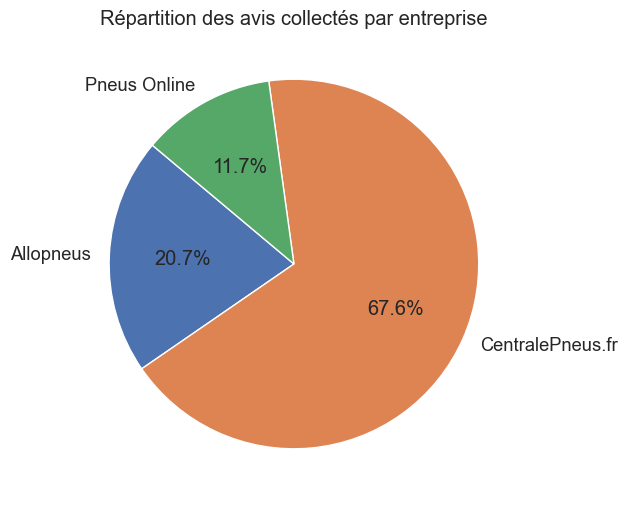

In [2]:
# Répartition des avis collectés par entreprise.
avis_par_entreprise = avis_trustpilot.groupby("Entreprise")["Client"].count().reset_index()
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")  # Choisissez une palette de couleurs
sns.set(font_scale=1.2)  # Ajustez la taille de la police
plt.pie(avis_par_entreprise["Client"], labels=avis_par_entreprise["Entreprise"], autopct="%1.1f%%", startangle=140)
plt.title("Répartition des avis collectés par entreprise")
plt.show()

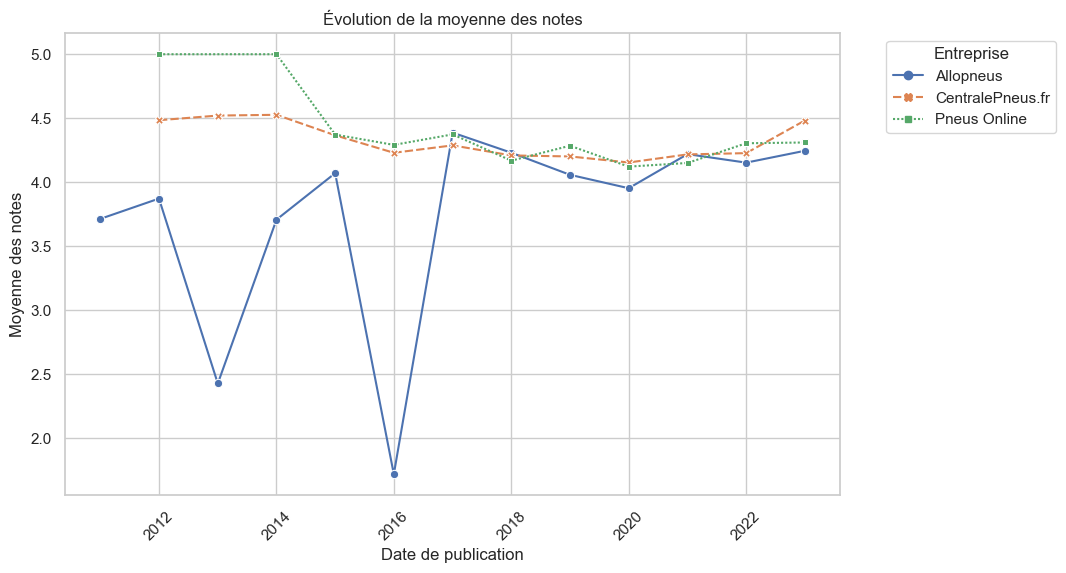

In [3]:
# Evolution de la moyenne des notes dans le temps.
avis_trustpilot["Annee"] = avis_trustpilot["Date_publication"].dt.year
pivot_table = pd.pivot_table(avis_trustpilot,values="Note",index=["Annee"], columns="Entreprise", aggfunc="mean")
pivot_table.index = pd.to_datetime(pivot_table.index, format='%Y')
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_table, markers=True)
plt.title("Évolution de la moyenne des notes")
plt.xlabel("Date de publication")
plt.ylabel("Moyenne des notes")
plt.legend(title="Entreprise", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

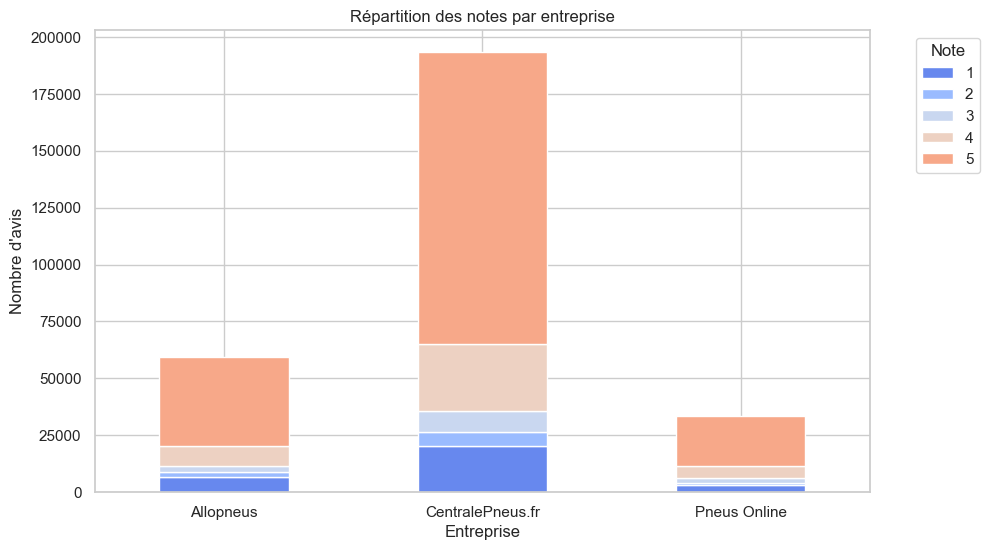

In [4]:
# Répartition des notes par entreprise.
note_counts = avis_trustpilot.groupby(["Entreprise","Note"]).size().unstack(fill_value=0)
sns.set_palette("coolwarm")
ax = note_counts.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("Entreprise")
plt.ylabel("Nombre d'avis")
plt.title("Répartition des notes par entreprise")
plt.legend(title="Note", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.show()

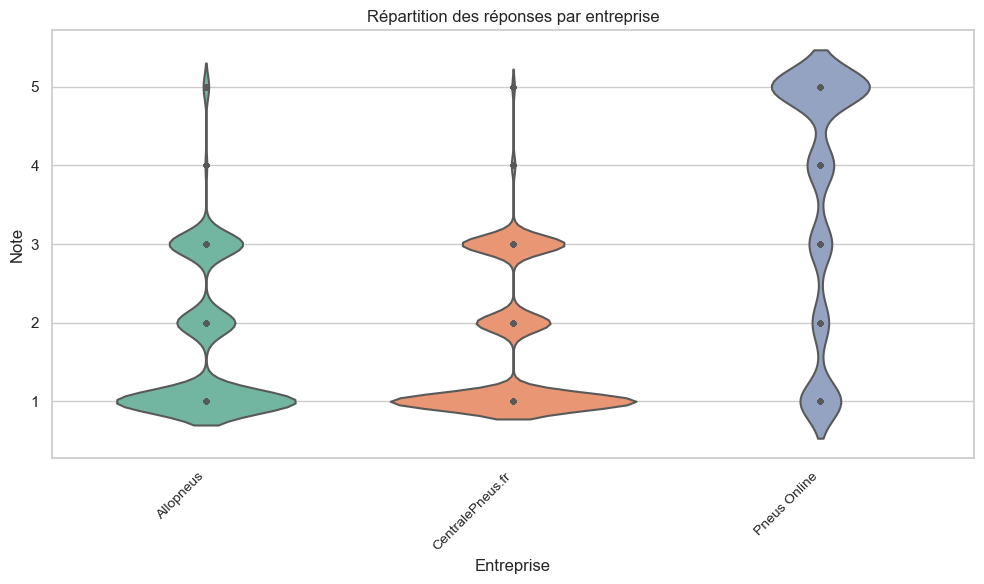

In [5]:
# Répartition des réponses par entreprise.
avis_trustpilot = avis_trustpilot.dropna(subset=["Reponse"])
sns.set_palette("Set2")
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=avis_trustpilot, x="Entreprise", y="Note", inner="point")
plt.xlabel("Entreprise")
plt.ylabel("Note")
plt.title("Répartition des réponses par entreprise")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

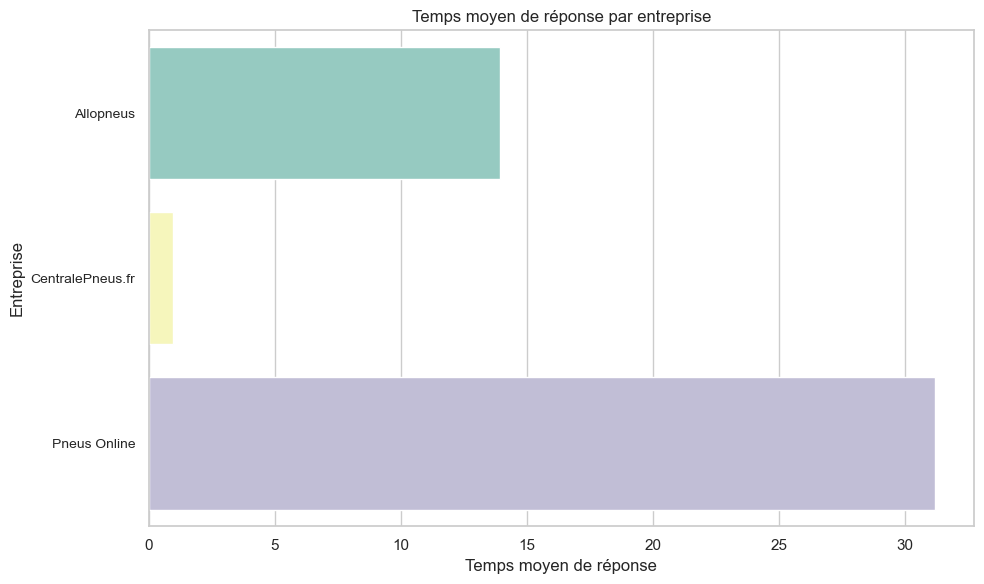

In [6]:
# Répartition du temps moyen de réponse par entreprise.  
avis_reponse = avis_trustpilot.dropna(subset=["Reponse"])
avis_reponse["Temps_de_reponse"] = (avis_reponse["Date_reponse"] - avis_reponse["Date_publication"]).dt.days
temps_moyen_reponse = avis_reponse.groupby("Entreprise")["Temps_de_reponse"].mean().reset_index()
sns.set_palette('Set3')
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=temps_moyen_reponse, y="Entreprise", x="Temps_de_reponse", orient="h")
plt.ylabel("Entreprise")
plt.xlabel("Temps moyen de réponse")
plt.title("Temps moyen de réponse par entreprise")
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

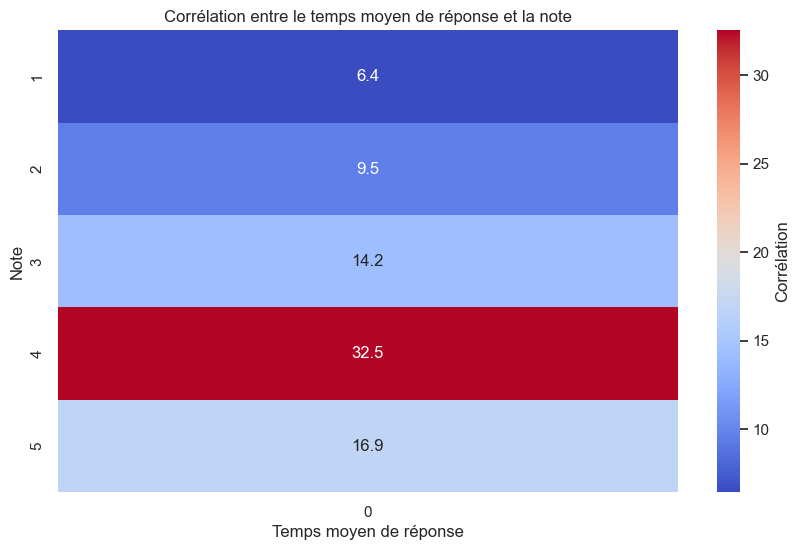

In [7]:
# Corrélation entre le temps moyen de réponse et la note.
avis_repondus = avis_trustpilot.dropna(subset=['Reponse'])
avis_repondus['Temps_de_reponse'] = (avis_repondus['Date_reponse'] - avis_repondus['Date_publication']).dt.days
temps_moyen_par_note = avis_repondus.groupby('Note')['Temps_de_reponse'].mean()
correlation = temps_moyen_par_note.corr(avis_repondus['Note'])
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(temps_moyen_par_note.values.reshape(-1, 1),annot=True,fmt=".1f",cmap="coolwarm",
    yticklabels=temps_moyen_par_note.index,cbar_kws={'label': 'Corrélation'},)
heatmap.set_title('Corrélation entre le temps moyen de réponse et la note')
plt.xlabel('Temps moyen de réponse')
plt.ylabel('Note')
plt.show()